# KSA: Polar Observations and Modelling

# Week 6 - Introduction to an ocean/sea ice model

In the past couple of weeks we have used different types of oceanographic observations. Good quality observations are vital, but we have also seen how sparsely observed the Southern Ocean is due to its remote and harsh environment. Numerical models allow us to overcome, partially, the lack of data, using numerical methods to represent our understanding of the physics of the ocean within a simulation. Models not always offer an accurate or exhaustive representation of reality, but they provide a virtual "laboratory" from which we can explore and understand processes and mechanisms involved in different ocean phenomena. Numerical modelling supports and is supported by observational oceanography, and is one of the pillars of modern day oceanography and climate science. For example, a lot of our understanding of [future changes associated to climate change](https://www.wcrp-climate.org/wgcm-cmip) comes from numerical models!

## ACCESS-OM2 

<div style="float: right; margin-right: 20px; margin-left: 30px; width: 20%; max-width: 500px;">
    <img src="images/access-diagram.png" width="100%" />
</div>

ACCESS-OM2, short for Australian Community Climate and Earth-System Simulator Ocean Model 2, is a global, coupled ocean/sea ice model. What does this mean? The figure on the right, adapted from [Kiss et al. 2020](https://gmd.copernicus.org/articles/13/401/2020/), illustrates the model configuration. It has two "components", one of which is an ocean model (MOM) and the other a sea ice model (CICE). These two components are coupled, which really only means that the ocean can affect *and* be affected by sea ice, and viseversa. This coupled system is forced by a "prescribed" atmosphere, which means that the atmosphere is a boundary condition and is not affected by either the ocean or the sea ice. 

This is a model with quite high degree of complexity and it is what we would call (if we dare) a "realistic" model. There are also "idealised" models, that don't seek realism in their representation of the ocean state, but rather realism in a particular process (like mixing, which requires very high spatial resolution). And while ACCESS has the ability to reproduce a lot of the observed features of the Southern Ocean, it doesn't have the ability to represent others. For example, it doesn't have tides, or icebergs, or ice sheets. But it is still a fabulous model to use for a lot of applications.

Generally speaking, model resolution (the size of its grid and its timestep) and its degree of realism go hand in hand, but they also come at a computational cost. Higher resolution models will cbe more expensive to run and will create a larger dataset that is harder to store and analyse. To get an idea of how the ocean representation changes with resolution, the figures below show the surface current speeds at the southern tip of Africa, where the very energetic Agulhas current ends, for three different horizontal grid resolutions of ACESS-OM2 (1$^{\circ}$, 0.25$^{\circ}$ and 0.1$^{\circ})$:

![image](images/access-res-comp.png)

This class we will use the 1$^{\circ}$ resolution. Let's begin by see the data structure:

In [1]:
import cmocean as cm
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In the `data/` folder there are five different datasets:

 - `access-om2_depth.nc` has the variable `ht`, which is the bathymetry of the model
 - `access-om2_o2_avg_2000-2018.nc` has the variable `o2`, which is oxygen in units of mmol/m$^3$
 - `access-om2_temp_salt_avg_2000-2018.nc` has the 3D `temp` and `salt`, which are conservative temperature (in K) and practical salinity (in PSU)
 - `access-om2_u_v_avg_2000-2018.nc` has the 3D `u` and `v`, which are zonal and meridional velocities respectively, in m/s

All these variables where averaged over the period 2000 to 2018. Let's see what the model data looks like:

In [2]:
depth = xr.open_dataset('/home/561/jn8053/g_jk72/KSA_Observations_Modelling/Class5/data/access-om2_depth.nc')

In [3]:
depth

<xarray.Dataset> Size: 314kB
Dimensions:   (yt_ocean: 72, xt_ocean: 360)
Coordinates:
  * xt_ocean  (xt_ocean) float64 3kB -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 576B -77.88 -77.63 -77.38 ... -36.47 -35.48
    geolat_t  (yt_ocean, xt_ocean) float32 104kB ...
    geolon_t  (yt_ocean, xt_ocean) float32 104kB ...
Data variables:
    ht        (yt_ocean, xt_ocean) float32 104kB ...
Attributes: (12/19)
    filename:                                 ocean_grid.nc
    title:                                    ACCESS-OM2-BGC
    grid_type:                                mosaic
    grid_tile:                                1
    intake_esm_vars:                          ht
    intake_esm_attrs:path:                    /g/data/ik11/outputs/access-om2...
    ...                                       ...
    intake_esm_attrs:variable_cell_methods:   time: point,time: point,time: p...
    intake_esm_attrs:variable_units:          m,m,degrees_N,degrees_E,degrees...
    intake_esm_attrs:filename:                ocean_grid.nc
    intake_esm_attrs:file_id:                 ocean_grid
    intake_esm_attrs:_data_format_:           netcdf
    intake_esm_dataset_key:                   ocean_grid.fx

<div style="float: right; margin-right: 20px; margin-left: 30px; width: 20%; max-width: 500px;">
    <img src="images/arakawa.png" width="100%" />
</div>

We have been working with observations so far, which name their dimensions some variation of `lat`, `lon`. Numerical models need to have a grid that allows to numerically represent physical processes (such as advection of tracers, transport, mixing, etc), so their dimensions are slightly more complicated. 

ACCESS-OM2 uses an Arakawa B-grid, which is a "staggered" grid, where scalars are evaluated at the center of the cells, and vectors at the edges (schamatic on the right). In ACCESS, the dimension in the center of cells is denoted with a `t`, and in the corners with a `u`. 

So, our depth variable is positioned in the center of the cells and its longitude dimension is called `xt_ocean`, its latitude `yt_ocean`. Let's do a quick plot of it:

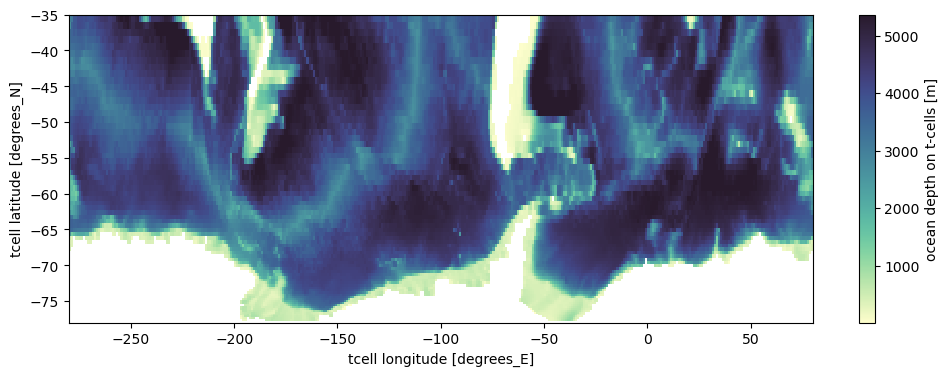

In [9]:
depth['ht'].plot(figsize = (12,4), cmap = cm.cm.deep)

It is pretty coarse if you remember our bathymetry dataset from the first class! This is because our model grid is 1$^{\circ}$ resolution, and the ETOPO dataset is of ~0.01$^{\circ}$. 

Also, **look at the longitude dimension** (`xt_ocean`). It is not in the usual [-180,180] or [0.360] conventions, it is actually going from [-280,80]. This will be something to keep in mind when doing spatial selections.

Now let's look at a 3D variable, say `temp`:

In [12]:
temp = xr.open_dataset('/home/561/jn8053/g_jk72/KSA_Observations_Modelling/Class5/data/access-om2_temp_salt_avg_2000-2018.nc')
# Convert to degC
temp = temp['temp']-273.15

In [13]:
temp

<xarray.DataArray 'temp' (st_ocean: 50, yt_ocean: 72, xt_ocean: 360)> Size: 5MB
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [15.285828, 15.202728, 15.128937, ..., 15.543152, 15.461151,
         15.372009],
        [15.838165, 15.769928, 15.704041, ..., 16.058533, 15.982605,
         15.904907],
        [16.491364, 16.425354, 16.367035, ..., 16.65268 , 16.599518,
         16.550568]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 3kB -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 576B -77.88 -77.63 -77.38 ... -36.47 -35.48
  * st_ocean  (st_ocean) float64 400B 1.152 3.649 6.565 ... 5.034e+03 5.254e+03

Now we have an extra dimension, called `st_ocean`, which is our vertical coordinate. Take a look at a cross-section, with horizontal lines for each level:

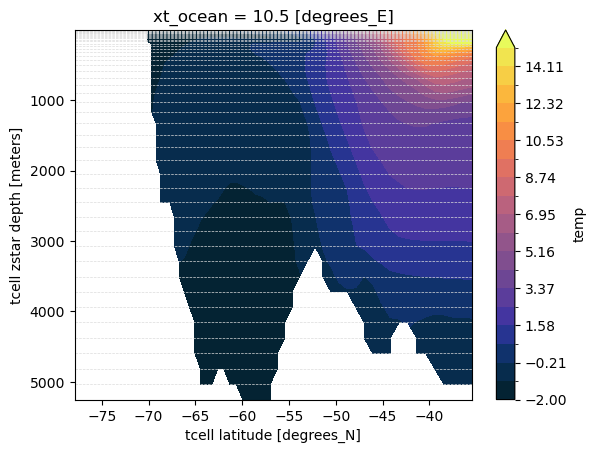

In [20]:
temp.sel(xt_ocean = 10, method = 'nearest').plot.contourf(vmin = -2, vmax = 15, levels = 20, cmap = cm.cm.thermal)
plt.gca().invert_yaxis()
for depth in temp['st_ocean']:
    plt.axhline(y = depth, color = 'gainsboro', linestyle = '--', linewidth = .5)

You can see how the size of thickness of the cells is not uniform! There are smaller gridcells at the surface, and thicker at the bottom. This is because the surface of the ocean has larger variability than the bottom, where properties change slowly and over large spatial distances, and so we need higher resolution at the top to properly represent it. 

Let's look at velocities now:

In [21]:
vel = xr.open_dataset('/home/561/jn8053/g_jk72/KSA_Observations_Modelling/Class5/data/access-om2_u_v_avg_2000-2018.nc')
vel

<xarray.Dataset> Size: 10MB
Dimensions:   (st_ocean: 50, yu_ocean: 71, xu_ocean: 360)
Coordinates:
  * st_ocean  (st_ocean) float64 400B 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
  * xu_ocean  (xu_ocean) float64 3kB -279.0 -278.0 -277.0 ... 78.0 79.0 80.0
  * yu_ocean  (yu_ocean) float64 568B -77.75 -77.51 -77.26 ... -36.96 -35.98
Data variables:
    v         (st_ocean, yu_ocean, xu_ocean) float32 5MB ...
    u         (st_ocean, yu_ocean, xu_ocean) float32 5MB ...

Now our coordinates are called `xu_ocean` and `yu_ocean`. Let's take a look at a small section to verify they are staggered with respect to the `xt_ocean`:

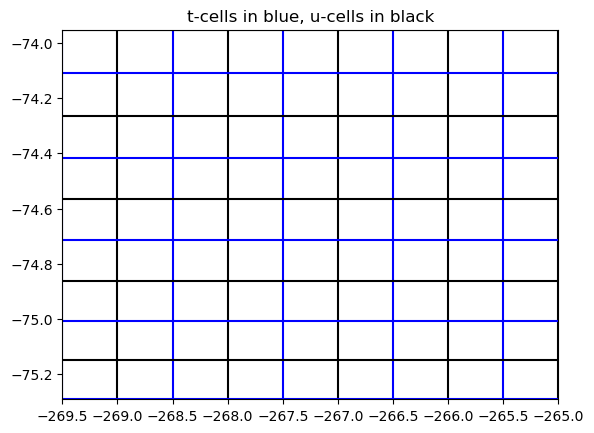

In [39]:
for x in range(10, 15):
    plt.axvline(x = temp['xt_ocean'][x], color = 'blue')
    plt.axvline(x = vel['xu_ocean'][x], color = 'k')
for y in range(10, 15):
    plt.axhline(y = temp['yt_ocean'][y], color = 'blue')
    plt.axhline(y = vel['yu_ocean'][y], color = 'k')
plt.xlim(temp['xt_ocean'][10], vel['xu_ocean'][14])
plt.ylim(temp['yt_ocean'][10], vel['yu_ocean'][14])
plt.title('t-cells in blue, u-cells in black');

And this is how you do a simple plot of zonal velocities:

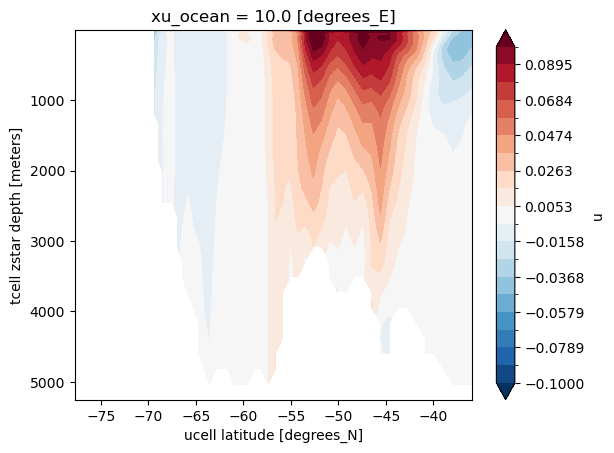

In [35]:
vel['u'].sel(xu_ocean = 10, method = 'nearest').plot.contourf(vmin = -.1, vmax = .1, levels = 20, cmap = 'RdBu_r')
plt.gca().invert_yaxis()